<a href="https://colab.research.google.com/github/Luciavaldera/ufv-VISUALIZACION-DE-DATOS/blob/main/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd

file_path = '/content/datos_ejercicio_ventas.csv'
df = pd.read_csv(file_path)
print(df.head())


         COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0       Portugal     Lipton (L3)  2023     12  AI_forecast  AI_P02F   
1  Great Britain     Lipton (L3)  2023     12  AI_forecast  AI_P10F   
2          Spain  Pepsi Max (L3)  2023     12  AI_forecast  AI_P09F   
3  Great Britain        7up (L3)  2024     12  AI_forecast  AI_P10F   
4        Hungary     Lipton (L3)  2023      9  AI_forecast  AI_P03F   

   FORECAST_YEAR         AMOUNT  
0         2023.0  754356.237194  
1         2023.0  560030.558029  
2         2023.0   88501.980847  
3         2023.0  363224.511516  
4         2023.0  396176.120491  


INTERPRETACIÓN DE LOS DATOS

*Country*: País al que corresponde el dato.
Subbrand: Submarca o línea de productos específica.
Año: Año del registro.

*Mes*: Mes correspondiente al dato.

*Escenario*: Existen dos posibles escenarios:

- *AI forecast*: Predicción realizada para ese mes y año. Cuando se utiliza este valor, los siguientes dos campos contendrán datos de predicción.

- *Actual*: Representa las ventas reales en ese mes y año.

*Forecast*: Indica el mes en el que se realizó la predicción. El número tras la "P" es el mes en que se hizo la predicción más uno. Por ejemplo, "AI_P02F" indica que la predicción se realizó en enero.

*Forecast year*: Año en el que se hizo la predicción.

*Amount*: Valor que refleja la cantidad, generalmente relacionada con ventas.






##Preguntas a responder:

1) Como se distribuyen las ventas realizadas en:
- Cada pais
- Cada mes y año
- Cada marca

2) Cual es la tendencia y estacionalidad de:
- Todas las ventas del pais con menos ventas
- La marca con mas ventas

3) Cuales son las predicciones hechas en España y como de buenas son?


##Herramientas:

Herramientas de desarrollo:

• Python (lenguaje)

• Google Colab (entorno)

• Plotly Express (librería principal)




In [4]:
pip install plotly_express


##Indicaciones

- Ver cuántos datos son predicciones (forecast) y cuántos son reales (actuals).

- Determinar el horizonte de previsión.

- Contar cuántos países diferentes hay y listar los nombres de los países.

- Obtener el histórico de datos tanto de forecast como de actuals.

- Contar cuántos tipos distintos de forecast existen.

*(el horizote de prediccion de una de las predicciones es el mismo para todas)*


- Ver cuántos datos son predicciones (forecast) y cuántos son reales (actuals).



In [5]:

count_scenarios = df['SCENARIO'].value_counts()
print(count_scenarios)

SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


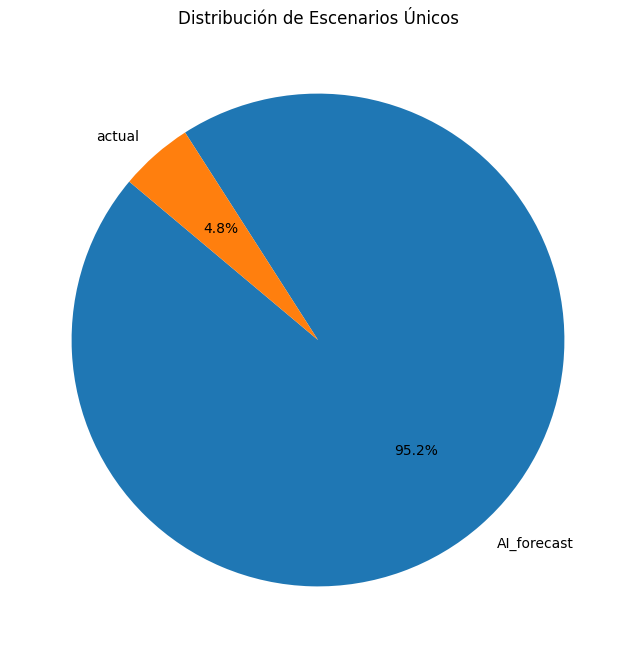

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(count_scenarios, labels=count_scenarios.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Escenarios Únicos")
plt.show()


La mayoría de los registros son predicciones (17,766), bajo el escenario 'AI_forecast',solo 900 registros corresponden a ventas reales ('actual').
Esto indica que el conjunto de datos está principalmente enfocado en las predicciones hechas por la inteligencia artificial.


- Determinar el horizonte de previsión.

In [9]:

numero_de_registros = df[(df['COUNTRY'] == 'Portugal') & (df['SUBBRAND'] == 'Lipton (L3)') & (df['FORECAST'] == 'AI_P02F')].shape[0]
numero_de_registros2 = df[(df['COUNTRY'] == 'Denmark') & (df['SUBBRAND'] == 'Pepsi Max (L3)') & (df['FORECAST'] == 'AI_P02F')].shape[0]

print("Número de registros que cumplen con los criterios:", numero_de_registros)
print("Número de registros que cumplen con los criterios:", numero_de_registros2)

Número de registros que cumplen con los criterios: 18
Número de registros que cumplen con los criterios: 36



- Contar cuántos países diferentes hay y listar los nombres de los países.

In [10]:
unique_countries = df['COUNTRY'].unique()
count_countries = len(unique_countries)


print("Número de países únicos:", count_countries)


print("Nombres de los países:")
for country in sorted(unique_countries):
    print("-", country)


Número de países únicos: 9
Nombres de los países:
- Czech
- Denmark
- Great Britain
- Hungary
- Italy
- Netherlands
- Norway
- Portugal
- Spain


In [11]:
import plotly.express as px
import pandas as pd



unique_countries = [country if country != 'Great Britain' else 'United Kingdom' for country in unique_countries]


data = pd.DataFrame({
    'country': unique_countries,
    'highlight': range(len(unique_countries))
})

fig = px.choropleth(data, locations="country", locationmode="country names", color="highlight",
                    hover_name="country", color_continuous_scale="Viridis", scope="europe")


fig.update_layout(title="Países únicos resaltados en Europa con colores distintos", coloraxis_showscale=False)

fig.show()


- Obtener el histórico de datos tanto de forecast como de actuals.

In [12]:

forecast_data = df[df['SCENARIO'] == 'AI_forecast']


actuals_data = df[df['SCENARIO'] == 'actual']


forecast_data = forecast_data.sort_values(by=['YEAR', 'MONTH'])
actuals_data = actuals_data.sort_values(by=['YEAR', 'MONTH'])


print("Histórico de datos de Forecast (primeras 5 entradas):")
print(forecast_data[['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'AMOUNT', 'FORECAST']].head().to_string(index=False))

print("\nHistórico de datos de Actuals (primeras 5 entradas):")
print(actuals_data[['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'AMOUNT']].head().to_string(index=False))


Histórico de datos de Forecast (primeras 5 entradas):
      COUNTRY           SUBBRAND  YEAR  MONTH       AMOUNT FORECAST
        Czech     Pepsi Max (L3)  2023      1 3.174244e+05    AI_PF
      Hungary     Pepsi Max (L3)  2023      1 5.050095e+05    AI_PF
     Portugal Pepsi Regular (L3)  2023      1 1.692465e+05    AI_PF
Great Britain      7up Free (L3)  2023      1 1.207824e+06    AI_PF
       Norway           7up (L3)  2023      1 6.636102e+03    AI_PF

Histórico de datos de Actuals (primeras 5 entradas):
    COUNTRY       SUBBRAND  YEAR  MONTH       AMOUNT
      Spain Pepsi Max (L3)  2023      1 8.327406e+04
    Hungary       7up (L3)  2023      1 6.464034e+04
Netherlands Pepsi Max (L3)  2023      1 6.868530e+05
     Norway Pepsi Max (L3)  2023      1 2.521704e+06
   Portugal  7up Free (L3)  2023      1 7.207855e+04



- Contar cuántos tipos distintos de forecast existen.

In [13]:

unique_forecasts = df['FORECAST'].dropna().unique()


number_of_unique_forecasts = len(unique_forecasts)

print("Número de tipos distintos de forecast:", number_of_unique_forecasts)
print("Tipos de forecast:")
for forecast in sorted(unique_forecasts):
    print("-", forecast)


Número de tipos distintos de forecast: 12
Tipos de forecast:
- AI_P02F
- AI_P03F
- AI_P04F
- AI_P05F
- AI_P06F
- AI_P07F
- AI_P08F
- AI_P09F
- AI_P10F
- AI_P11F
- AI_P12F
- AI_PF


En el siguiente gráfico de barras podemos observar la frecuencia de cada forecast único

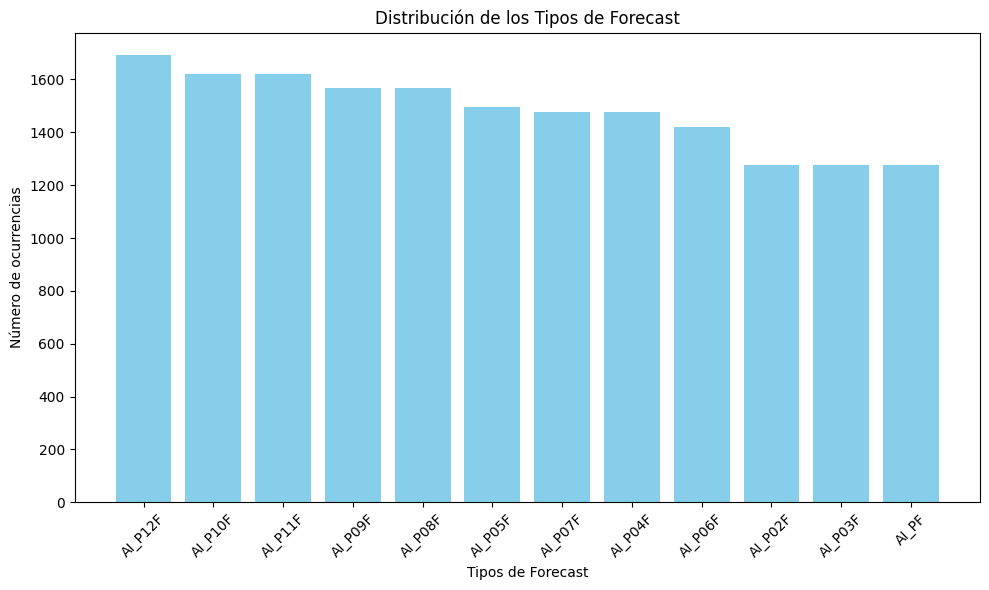

In [14]:
import matplotlib.pyplot as plt

forecast_counts = df['FORECAST'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(forecast_counts.index, forecast_counts.values, color='skyblue')
plt.xlabel('Tipos de Forecast')
plt.ylabel('Número de ocurrencias')
plt.title('Distribución de los Tipos de Forecast')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



1) Como se distribuyen las ventas realizadas en:
- Cada pais

Se escogerán solo los datos de ventas reales (actuals) porque muestran lo que realmente ocurrió en ventas, sin la incertidumbre de las predicciones.

In [15]:
import plotly.express as px


ventas_por_pais_producto = df[df['SCENARIO'] == 'actual'].groupby(['COUNTRY', 'SUBBRAND'])['AMOUNT'].sum().reset_index()


fig = px.bar(ventas_por_pais_producto, x='COUNTRY', y='AMOUNT', color='SUBBRAND',
             barmode='group',
             title='Ventas Totales de Cada Producto en Cada País',
             labels={'COUNTRY': 'País', 'AMOUNT': 'Ventas Totales', 'SUBBRAND': 'Producto'},
             color_discrete_sequence=px.colors.qualitative.Plotly,
             width=1000, height=600)


fig.show()


Se eligió un gráfico de barras porque hace más fácil comparar las ventas de los productos entre los diferentes países. Los colores permiten identificar cada producto de forma rápida y se usa el mismo color para representar cada producto en todos los países, lo que mantiene la claridad.

Del gráfico se puede destacar que Pepsi Max tiene ventas mucho más altas en Great Britain que cualquier otro producto o país.

- Cada mes y año


In [16]:
import plotly.express as px


ventas_por_mes_año = df[df['SCENARIO'] == 'actual'].groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

fig = px.line(ventas_por_mes_año, x='MONTH', y='AMOUNT', color='YEAR',
              title='Distribución de Ventas Realizadas en Cada Mes y Año',
              labels={'MONTH': 'Mes', 'AMOUNT': 'Ventas Totales', 'YEAR': 'Año'},
              line_shape='linear', width=1000, height=600)


fig.show()


Se ha optado por utilizar un diagrama de líneas que muestra la distribución de ventas en cada mes y año, ya que permite observar las tendencias de ventas mensuales diferenciadas por año de manera clara y continua. Este tipo de gráfico facilita la comparación de la evolución de las ventas a lo largo de los meses para cada año. Además, el diferenciarlos por color para cada año ayuda a identificar rápidamente cómo varían las ventas entre distintos periodos.

In [17]:
import plotly.express as px


ventas_por_mes_año = df[df['SCENARIO'] == 'actual'].groupby(['MONTH', 'YEAR'])['AMOUNT'].sum().reset_index()


fig = px.bar(ventas_por_mes_año, x='MONTH', y='AMOUNT', color='YEAR',
             title='Distribución de Ventas por Mes para 2023 y 2024',
             labels={'MONTH': 'Mes', 'AMOUNT': 'Ventas Totales', 'YEAR': 'Año'},
             barmode='group',
             color_discrete_map={2023: '#87CEFA', 2024: '#FFA07A'},
             width=800, height=500)


fig.show()



Como adición a el grafico de lineas anterior, se ha creado un gráfico combinado en el que se pueden observar las ventas de cada mes diferenciadas según el año (2023 y 2024). En este gráfico, cada mes contiene una barra para cada año. La diferenciación por color facilita esta comparación, asignando a cada año un color específico que permite identificar rápidamente la variación entre los dos periodos.








- Cada marca


In [18]:
import plotly.express as px


ventas_por_marca = df[df['SCENARIO'] == 'actual'].groupby('SUBBRAND')['AMOUNT'].sum().reset_index()

fig = px.bar(ventas_por_marca, x='SUBBRAND', y='AMOUNT',
             title='Distribución de Ventas por Marca',
             labels={'SUBBRAND': 'Marca', 'AMOUNT': 'Ventas Totales'},
             color_discrete_sequence=['#00CC96'], width=1000, height=600)


fig.show()


Se ha seleccionado un diagrama de barras para visualizar la distribución de ventas por marca, ya que permite una comparación clara y directa de las cantidades de ventas en cada categoría. Las marcas son una variable categórica, y el diagrama de barras es ideal para representar este tipo de datos. El uso de un color uniforme en todas las barras refuerza la claridad visual y permite centrarse en la comparación entre las diferentes marcas sin distracciones.


2) Cual es la tendencia y estacionalidad de:
- Todas las ventas del pais con menos ventas


Primero hay que agrupar las ventas por país y obtener el país con menos ventas

In [19]:
import plotly.express as px

ventas_por_pais = df[df['SCENARIO'] == 'actual'].groupby('COUNTRY')['AMOUNT'].sum().reset_index()
pais_menos_ventas = ventas_por_pais.loc[ventas_por_pais['AMOUNT'].idxmin(), 'COUNTRY']

print("País con menos ventas:", pais_menos_ventas)

País con menos ventas: Spain


Segundo hay que filtrar las ventas solo para el país con menos ventas y agrupar por año y mes para ver la evolución temporal de las ventas

In [20]:

ventas_pais_menos = df[(df['SCENARIO'] == 'actual') & (df['COUNTRY'] == pais_menos_ventas)]

ventas_pais_menos = ventas_pais_menos.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()


Luego se crea una columna de fecha combinando año y mes

In [24]:


ventas_pais_menos['Fecha'] = ventas_pais_menos['YEAR'].astype(str) + '-' + ventas_pais_menos['MONTH'].astype(str)
ventas_pais_menos['Fecha'] = pd.to_datetime(ventas_pais_menos['Fecha'], format='%Y-%m')

fig = px.line(ventas_pais_menos, x='Fecha', y='AMOUNT',
              title=f'Tendencia y Estacionalidad de Ventas en {pais_menos_ventas}',
              labels={'Fecha': 'Fecha', 'AMOUNT': 'Ventas'},
              line_shape='linear',width=1000, height=600)


fig.show()

En el gráfico de líneas se observa la tendencia y estacionalidad de las ventas en España, que es el país con menos ventas en los datos. La línea muestra la evolución de las ventas mes a mes a lo largo del tiempo.

- Tendencia: Parece que las ventas muestran un  crecimiento suave en el largo plazo, especialmente hacia mediados de 2024, donde las ventas comienzan a crecer otra vez.

- Estacionalidad:

El gráfico muestra una estacionalidad de ventas en España con patrones específicos en ciertos periodos:

- Marzo tiene un pico en ventas, lo que indica un aumento en la demanda durante el primer trimestre del año.
- Julio y septiembre también muestran aumentos, lo cual podría ser una temporada alta durante el verano en España.
- Noviembre tiene otro punto alto, lo que puede ser una campaña de fin de año o eventos estacionales.




- La marca con mas ventas



In [25]:

ventas_por_marca = df[df['SCENARIO'] == 'actual'].groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
marca_mas_ventas = ventas_por_marca.loc[ventas_por_marca['AMOUNT'].idxmax(), 'SUBBRAND']
print("La marca con más ventas:", marca_mas_ventas)

La marca con más ventas: Pepsi Max (L3)


In [30]:

ventas_marca_mas = df[(df['SCENARIO'] == 'actual') & (df['SUBBRAND'] == marca_mas_ventas)]

ventas_marca_mas = ventas_marca_mas.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

ventas_marca_mas['Fecha'] = ventas_marca_mas['YEAR'].astype(str) + '-' + ventas_marca_mas['MONTH'].astype(str)
ventas_marca_mas['Fecha'] = pd.to_datetime(ventas_marca_mas['Fecha'], format='%Y-%m')


fig = px.line(ventas_marca_mas, x='Fecha', y='AMOUNT',
              title=f'Tendencia y Estacionalidad de Ventas de {marca_mas_ventas}',
              labels={'Fecha': 'Fecha', 'AMOUNT': 'Ventas'},
              line_shape='linear',width=1000, height=600)


fig.show()

En el gráfico de líneas se observa la tendencia y estacionalidad de las ventas de Pepsi Max (L3), que es la marca con más ventas en los datos.

- Tendencia: Aunque hay fluctuaciones mensuales, las ventas de Pepsi Max (L3) tienen una tendencia de crecimiento suave en el largo plazo.

- Estacionalidad:

El gráfico muestra una estacionalidad de ventas, en particular, se observan picos en:

  - Marzo, que señala un aumento en el primer trimestre del año.
  - Noviembre, que hay segundo pico importante a finales de año, que se puede deber a campañas de fin de año o eventos estacionales.


Se ha elegido un gráfico de líneas en ambos casos porque permite ver fácilmente cómo cambian las ventas mes a mes siendo estas variables discretas.
Con este grafico se puede observar tanto la tendencia general como la estacionalidad.

Las ventas reales en España son bastante consistentes, con un promedio de 406,563 y una variación moderada entre el mínimo y el máximo. En cambio, las ventas predichas tienen un promedio mucho más alto (7,253,873) y presentan gran variabilidad, lo que indica que las predicciones están en una escala mucho mayor y son menos estables.

3) Cuales son las predicciones hechas en España y como de buenas son?

In [27]:
import pandas as pd
import plotly.graph_objects as go


ventas_reales_esp = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'actual')]
predicciones_esp = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'AI_forecast')]


ventas_reales_esp = ventas_reales_esp.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()
predicciones_esp = predicciones_esp.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()


ventas_reales_esp['Fecha'] = pd.to_datetime(ventas_reales_esp['YEAR'].astype(str) + '-' + ventas_reales_esp['MONTH'].astype(str) + '-01')
predicciones_esp['Fecha'] = pd.to_datetime(predicciones_esp['YEAR'].astype(str) + '-' + predicciones_esp['MONTH'].astype(str) + '-01')


comparacion_esp = pd.merge(ventas_reales_esp, predicciones_esp, on='Fecha', suffixes=('_real', '_pred'))


fig = go.Figure()


fig.add_trace(go.Bar(x=comparacion_esp['Fecha'], y=comparacion_esp['AMOUNT_real'],
                     name='Ventas Reales', marker_color='blue'))

fig.add_trace(go.Bar(x=comparacion_esp['Fecha'], y=comparacion_esp['AMOUNT_pred'],
                     name='Ventas Predichas', marker_color='orange'))


fig.update_layout(
    title='Comparación de Ventas Reales y Predichas en España',
    xaxis_title='Fecha',
    yaxis_title='Ventas Totales',
    barmode='group',
    legend_title='Tipo de Ventas'
)


fig.show()


Para comparar las ventas reales y las predicciones en España, se ha elegido un gráfico de barras. Este tipo de gráfico es ideal para datos discretos, como las ventas mensuales, ya que permite visualizar cada mes como una categoría independiente. Al mostrar las ventas reales y predichas en barras, podemos ver de manera clara las diferencias entre ambas para cada periodo.

Para diferenciar las dos series de datos, se ha utilizado el color azul para las ventas reales y naranja para las predicciones. Estos colores contrastantes ayudan a identificar de inmediato cada barra, haciendo que la interpretación del gráfico sea rápida y sencilla.

In [28]:

comparacion_esp['Error_Absoluto'] = abs(comparacion_esp['AMOUNT_real'] - comparacion_esp['AMOUNT_pred'])
comparacion_esp['Error_Porcentual'] = (comparacion_esp['Error_Absoluto'] / comparacion_esp['AMOUNT_real']) * 100


In [29]:
import plotly.express as px


fig_error = px.line(comparacion_esp, x='Fecha', y='Error_Absoluto',
                    title='Evolución del Error Absoluto de las Predicciones en España',
                    labels={'Fecha': 'Fecha', 'Error_Absoluto': 'Error Absoluto'},
                    width=1000, height=600)

fig_error.show()


Este gráfico de líneas muestra cómo ha ido evolucionando el error absoluto en las predicciones de ventas en España a lo largo del tiempo, desde enero de 2023 hasta julio de 2024. En el eje horizontal se representan las fechas, mientras que en el eje vertical se observa el valor del error absoluto en millones.

En general, se puede ver una tendencia creciente en el error, es decir, que las predicciones son cada vez menos precisas conforme avanza el tiempo. Al principio de 2023, el error es prácticamente nulo, lo que indica que las predicciones en esos primeros meses estaban bastante alineadas con las ventas reales. Sin embargo, a partir de junio de 2023, el error comienza a aumentar de forma notable, llegando a más de 8 millones en julio y continuando su crecimiento hasta superar los 14 millones en julio de 2024.

También hay algunos momentos en los que el crecimiento del error se estabiliza o incluso disminuye ligeramente, como en noviembre de 2023 y abril de 2024. Esto podría indicar que en esos meses las predicciones fueron algo más acertadas en comparación con otros periodos.